# 2. Propiedades estad√≠sticas del lenguaje

## Objetivos

- Mostrar el uso de CFG y derivados
    - Ejemplos de parseo de dependencias
- Ejemplificar etiquetado NER usando bibliotecas existentes
- Explorar propiedades estad√≠sticas del lenguaje natural y observar los siguientes fenomenos:
    - La distribuci√≥n de Zipf
    - La distribuci√≥n de Heap

- Implementar bolsas de palabras
    - Aplicar *TF.IDF*

## Perspectivas formales

- Fueron el primer acercamiento al procesamiento del lenguaje natural. Sin embargo tienen varias **desventajas**
- Requieren **conocimiento previo de la lengua**
- Las herramientas son especificas de la lengua
- Los fenomenos que se presentan son muy amplios y dif√≠cilmente se pueden abarcar con reglas formales (muchos casos especiales)
- Las reglas tienden a ser rigidas y no admiten incertidumbre en el resultado

### Sintaxis

![](https://imgs.xkcd.com/comics/formal_languages_2x.png)

**[audience looks around] 'What just happened?' 'There must be some context we're missing.'**

#### Parsing basado en reglas

- Gramaticas libres de contexto:

$G = (T, N, O, R)$
* $T$ s√≠mbolos terminales.
* $N$ s√≠mbolos no terminales.
* $O$ simbolo inicial o nodo ra√≠z.
* $R$ reglas de la forma $X \longrightarrow \gamma$ donde $X$ es no terminal y $\gamma$ es una secuencia de terminales y no terminales

In [1]:
import nltk

In [2]:
plain_grammar = """
S -> NP VP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
PP -> P NP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
"""

In [3]:
grammar = nltk.CFG.fromstring(plain_grammar)
# Cambiar analizador y trace
analyzer = nltk.ChartParser(grammar)

sentence = "I shot an elephant in my pajamas".split()
trees = analyzer.parse(sentence)

In [4]:
for tree in trees:
    print(tree, type(tree))
    print('\nBosquejo del √°rbol:\n')
    print(tree.pretty_print(unicodelines=True, nodedist=1))

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas))))) <class 'nltk.tree.tree.Tree'>

Bosquejo del √°rbol:

     S                                       
 ‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê                         
 ‚îÇ                  VP                       
 ‚îÇ        ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê              
 ‚îÇ        VP                   PP            
 ‚îÇ   ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê            ‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê          
 ‚îÇ   ‚îÇ        NP           ‚îÇ       NP        
 ‚îÇ   ‚îÇ    ‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê      ‚îÇ   ‚îå‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê    
 NP  V   Det        N      P  Det        N   
 ‚îÇ   ‚îÇ    ‚îÇ         ‚îÇ      ‚îÇ   ‚îÇ         ‚îÇ    
 I  shot  an     elephant  in  my     pajamas

None
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas)))))) <class 'nltk.tree.tre

## Perspectiva estad√≠stica

- Puede integrar aspectos de la perspectiva formal
- Lidia mejor con la incertidumbre y es menos rigida que la perspectiva formal
- No requiere conocimiento profundo de la lengua. Se pueden obtener soluciones de forma no supervisada

## Modelos estad√≠sticos

- Las **frecuencias** juegan un papel fundamental para hacer una descripci√≥n acertada del lenguaje
- Las frecuencias nos dan informaci√≥n de la **distribuci√≥n de tokens**, de la cual podemos estimar probabilidades.
- Existen **leyes emp√≠ricas del lenguaje** que nos indican como se comportan las lenguas a niveles estad√≠sticos
- A partir de estas leyes y otras reglas estad√≠sticas podemos crear **modelos del lenguaje**; es decir, asignar probabilidades a las unidades ling√º√≠sticas

### Probabilistic Context Free Grammar

In [5]:
taco_grammar = nltk.PCFG.fromstring("""
O    -> FN FV     [0.7]
O    -> FV FN     [0.3]
FN   -> Sust      [0.6]
FN   -> Det Sust  [0.4]
FV   -> V FN      [0.8]
FV   -> FN V      [0.2]
Sust -> 'Juan'    [0.5]
Sust -> 'tacos'   [0.5]
Det  -> 'unos'    [1.0]
V    -> 'come'    [1.0]
""")
viterbi_parser = nltk.ViterbiParser(taco_grammar)

In [6]:
sentences = [
    "Juan come unos tacos",
    "unos tacos Juan come"
]
for sent in sentences:
    for tree in viterbi_parser.parse(sent.split()):
        print(tree)
        print("Versi√≥n bosque")
        tree.pretty_print(unicodelines=True, nodedist=1)

(O
  (FN (Sust Juan))
  (FV (V come) (FN (Det unos) (Sust tacos)))) (p=0.0336)
Versi√≥n bosque
           O                
 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê             
 ‚îÇ             FV           
 ‚îÇ    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îê        
 FN   ‚îÇ             FN      
 ‚îÇ    ‚îÇ        ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îê   
Sust  V       Det       Sust
 ‚îÇ    ‚îÇ        ‚îÇ         ‚îÇ   
Juan come     unos     tacos

(O
  (FN (Det unos) (Sust tacos))
  (FV (FN (Sust Juan)) (V come))) (p=0.0084)
Versi√≥n bosque
                O               
      ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê       
      ‚îÇ                  FV     
      ‚îÇ             ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îê   
      FN            FN       ‚îÇ  
 ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îê        ‚îÇ        ‚îÇ   
Det       Sust     Sust      V  
 ‚îÇ         ‚îÇ        ‚îÇ        ‚îÇ   
unos     tacos     Juan     come



### Parseo de dependencias

Un parseo de dependencias devuelve las dependencias que se dan entre los tokens de una oraci√≥n. Estas dependencias suelen darse entre pares de tokens. Esto es, que relaciones tienen las palabras con otras palabras.

##### Freeling - https://nlp.lsi.upc.edu/freeling/demo/demo.php

In [7]:
import spacy
from spacy import displacy

In [8]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     - -------------------------------------- 1.3/42.3 MB 11.2 MB/s eta 0:00:04
     ----- ---------------------------------- 5.5/42.3 MB 16.8 MB/s eta 0:00:03
     ---------- ---------------------------- 11.5/42.3 MB 21.2 MB/s eta 0:00:02
     --------------- ----------------------- 17.3/42.3 MB 23.2 MB/s eta 0:00:02
     --------------------- ----------------- 23.3/42.3 MB 24.2 MB/s eta 0:00:01
     ------------------------ -------------- 26.2/42.3 MB 24.4 MB/s eta 0:00:01
     ------------------------------ -------- 32.8/42.3 MB 23.9 MB/s eta 0:00:01
     ----------------------------------- --- 38.5/42.3 MB 24.2 MB/s eta 0:00:01
     --------------------------------------  42.2/42.3 MB 23.5 MB/s eta 0:00:01
     --------------------------------------- 42.3/42.3 MB 22.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [9]:
nlp = spacy.load("es_core_news_md")

In [10]:
doc = nlp("La ni√±a come un suani")

In [11]:
displacy.render(doc, style="dep")

In [12]:
for chunk in doc.noun_chunks:
    print("text::", chunk.text)
    print("root::", chunk.root.text)
    print("root dep::", chunk.root.dep_)
    print("root head::", chunk.root.head.text)
    print("="*10)

text:: La ni√±a
root:: ni√±a
root dep:: nsubj
root head:: come
text:: un suani
root:: suani
root dep:: obj
root head:: come


In [13]:
for token in doc:
    print("token::", token.text)
    print("dep::", token.dep_)
    print("head::", token.head.text)
    print("head POS::", token.head.pos_)
    print("CHILDS")
    print([child for child in token.children])
    print("="*10)

token:: La
dep:: det
head:: ni√±a
head POS:: NOUN
CHILDS
[]
token:: ni√±a
dep:: nsubj
head:: come
head POS:: VERB
CHILDS
[La]
token:: come
dep:: ROOT
head:: come
head POS:: VERB
CHILDS
[ni√±a, suani]
token:: un
dep:: det
head:: suani
head POS:: PROPN
CHILDS
[]
token:: suani
dep:: obj
head:: come
head POS:: VERB
CHILDS
[un]


#### Named Entity Recognition (NER)

El etiquetado NER consiste en identificar "objetos de la vida real" como organizaciones, paises, personas, entre otras y asignarles su etiqueta correspondiente. Esta tarea es del tipo *sequence labeling* ya que dado un texto de entrada el modelo debe identificar los intervalos del texto y etiquetarlos adecuadamente con la entidad que le corresponde. Veremos un ejemplo a continuaci√≥n.

In [14]:
!pip install datasets

In [15]:
from datasets import load_dataset

c:\Users\david\miniconda3\envs\PLN\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
data = load_dataset("alexfabbri/multi_news", trust_remote_code=True)

In [17]:
# Explorar data
data?

Type:        DatasetDict
String form:
DatasetDict({
           train: Dataset({
           features: ['document', 'summary'],
           num_rows: 4 <...> )
           test: Dataset({
           features: ['document', 'summary'],
           num_rows: 5622
           })
           })
Length:      3
File:        c:\users\david\miniconda3\envs\pln\lib\site-packages\datasets\dataset_dict.py
Docstring:   A dictionary (dict of str: datasets.Dataset) with dataset transforms methods (map, filter, etc.)

In [18]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.3/33.5 MB 4.8 MB/s eta 0:00:07
     ----- ---------------------------------- 5.0/33.5 MB 13.7 MB/s eta 0:00:03
     ------------- ------------------------- 11.8/33.5 MB 18.5 MB/s eta 0:00:02
     -------------------- ------------------ 17.8/33.5 MB 21.2 MB/s eta 0:00:01
     --------------------------- ----------- 23.9/33.5 MB 22.2 MB/s eta 0:00:01
     ---------------------------------- ---- 29.9/33.5 MB 23.4 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 23.2 MB/s eta 0:00:01
     --------------------------------------- 33.5/33.5 MB 22.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [19]:
nlp = spacy.load("en_core_web_md")

In [20]:
import random

random.seed(42)
corpus = random.choices(data["train"]["summary"], k=3)
docs = list(nlp.pipe(corpus))
for j, doc in enumerate(docs):
    print(f"DOC #{j+1}")
    doc.user_data["title"] = " ".join(doc.text.split()[:10])
    for i, ent in enumerate(doc.ents):
        print(" -"*10, f"Entity #{i}")
        print(f"\tTexto={ent.text}")
        print(f"\tstart/end={ent.start_char}-{ent.end_char}")
        print(f"\tLabel={ent.label_}")

DOC #1
 - - - - - - - - - - Entity #0
	Texto=Washington
	start/end=2-12
	Label=GPE
 - - - - - - - - - - Entity #1
	Texto=last night
	start/end=26-36
	Label=TIME
 - - - - - - - - - - Entity #2
	Texto=annual
	start/end=46-52
	Label=DATE
 - - - - - - - - - - Entity #3
	Texto=the White House Correspondents Dinner
	start/end=83-120
	Label=ORG
 - - - - - - - - - - Entity #4
	Texto=Nerd Prom
	start/end=125-134
	Label=PERSON
 - - - - - - - - - - Entity #5
	Texto=Saturday Night Live's Cecily Strong
	start/end=142-177
	Label=WORK_OF_ART
 - - - - - - - - - - Entity #6
	Texto=Obama
	start/end=268-273
	Label=PERSON
 - - - - - - - - - - Entity #7
	Texto=Hollywood
	start/end=318-327
	Label=GPE
 - - - - - - - - - - Entity #8
	Texto=the Secret Service
	start/end=361-379
	Label=ORG
 - - - - - - - - - - Entity #9
	Texto=NPR
	start/end=527-530
	Label=ORG
 - - - - - - - - - - Entity #10
	Texto=AP
	start/end=539-541
	Label=ORG
 - - - - - - - - - - Entity #11
	Texto=Today
	start/end=544-549
	Label=DATE
 - - 

In [21]:
displacy.render(docs, style="ent")

In [22]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

[Available labels](https://spacy.io/models/en)

## Leyes estad√≠sticas

In [23]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [10, 6]
import numpy as np
import pandas as pd

In [24]:
mini_corpus = """Humanismo es un concepto polis√©mico que se aplica tanto al estudio de las letras humanas, los
estudios cl√°sicos y la filolog√≠a grecorromana como a una gen√©rica doctrina o actitud vital que
concibe de forma integrada los valores humanos. Por otro lado, tambi√©n se denomina humanis-
mo al ¬´sistema de creencias centrado en el principio de que las necesidades de la sensibilidad
y de la inteligencia humana pueden satisfacerse sin tener que aceptar la existencia de Dios
y la predicaci√≥n de las religiones¬ª, lo que se aproxima al laicismo o a posturas secularistas.
Se aplica como denominaci√≥n a distintas corrientes filos√≥ficas, aunque de forma particular,
al humanismo renacentista1 (la corriente cultural europea desarrollada de forma paralela al
Renacimiento a partir de sus or√≠genes en la Italia del siglo XV), caracterizado a la vez por su
vocaci√≥n filol√≥gica cl√°sica y por su antropocentrismo frente al teocentrismo medieval
"""
words = mini_corpus.replace("\n", " ").split(" ")
len(words)

146

In [25]:
vocabulary = Counter(words)
vocabulary.most_common(10)

[('de', 11),
 ('la', 7),
 ('al', 6),
 ('que', 5),
 ('a', 5),
 ('y', 4),
 ('se', 3),
 ('las', 3),
 ('forma', 3),
 ('aplica', 2)]

In [26]:
len(vocabulary)

101

In [27]:
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words", log_scale=False):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.title(title)

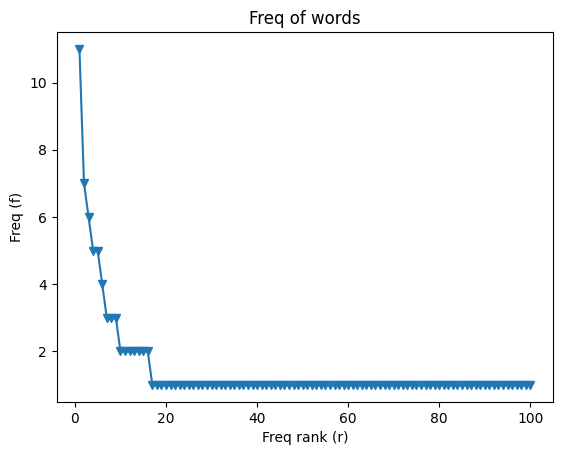

In [28]:
frequencies = get_frequencies(vocabulary, 100)
plot_frequencies(frequencies)

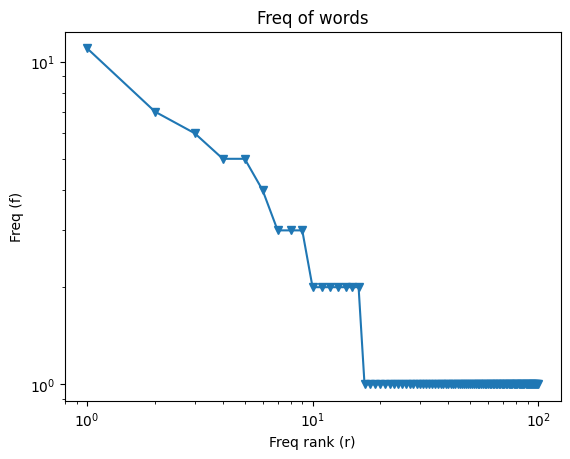

In [29]:
plot_frequencies(frequencies, log_scale=True)

**¬øQu√© pasar√° con m√°s datos? üìä**

### Ley Zipf

Exploraremos el Corpus de Referencia del Espa√±ol Actual [CREA](https://www.rae.es/banco-de-datos/crea/crea-anotado)

In [30]:
corpus_freqs = pd.read_csv("crea_frecs.txt", sep=" ")

In [31]:
corpus_freqs.head(15)

freq word
0   9999518   de
1   6277560   la
2   4681839  que
3   4569652   el
4   4234281   en
5   4180279    y
6   3260939    a
7   2618657  los
8   2022514   se
9   1857225  del
10  1686741  las
11  1659827   un
12  1561904  por
13  1481607  con
14  1465503   no

In [32]:
corpus_freqs.iloc[0]

freq    9999518
word         de
Name: 0, dtype: object

In [33]:
corpus_freqs[corpus_freqs["word"] == "barriga"]

freq     word
12615   872  barriga

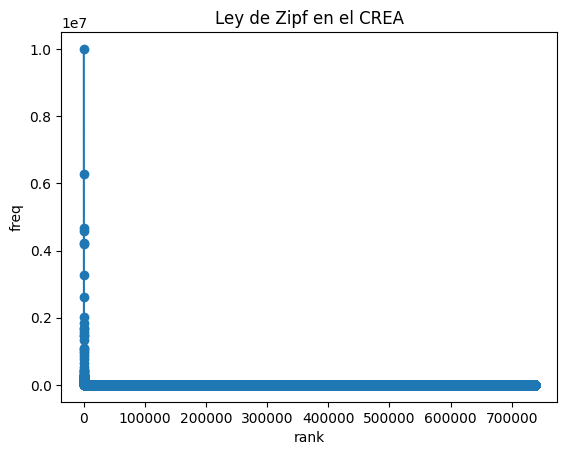

In [34]:
corpus_freqs["freq"].plot(marker="o")
plt.title('Ley de Zipf en el CREA')
plt.xlabel('rank')
plt.ylabel('freq')
plt.show()

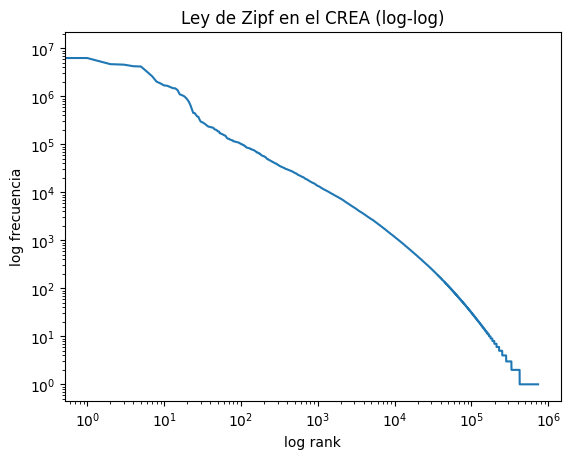

In [35]:
corpus_freqs['freq'].plot(loglog=True, legend=False)
plt.title('Ley de Zipf en el CREA (log-log)')
plt.xlabel('log rank')
plt.ylabel('log frecuencia')
plt.show()

- Notamos que las frecuencias entre lenguas siguen un patr√≥n
- Pocas palabras (tipos) son muy frecuentes, mientras que la mayor√≠a de palabras ocurren pocas veces

De hecho, la frecuencia de la palabra que ocupa la posici√≥n r en el rank, es proporcional a $\frac{1}{r}$ (La palabra m√°s frecuente ocurrir√° aproximadamente el doble de veces que la segunda palabra m√°s frecuente en el corpus y tres veces m√°s que la tercer palabra m√°s frecuente del corpus, etc)

$$f(w_r) \propto \frac{1}{r^Œ±}$$

Donde:
- $r$ es el rank que ocupa la palabra en el corpus
- $f(w_r)$ es la frecuencia de la palabra en el corpus
- $\alpha$ es un par√°metro, el valor depender√° del corpus o fen√≥meno que estemos observando

#### Formulaci√≥n de la Ley de Zipf:

$f(w_{r})=\frac{c}{r^{\alpha }}$

En la escala logar√≠timica:

$log(f(w_{r}))=log(\frac{c}{r^{\alpha }})$

$log(f(w_{r}))=log (c)-\alpha log (r)$

#### ‚ùì ¬øC√≥mo estimar el par√°metro $\alpha$?

Podemos hacer una regresi√≥n lineal minimizando la suma de los errores cuadr√°ticos:

$J_{MSE}=\sum_{r}^{}(log(f(w_{r}))-(log(c)-\alpha log(r)))^{2}$

In [36]:
from scipy.optimize import minimize

ranks = np.array(corpus_freqs.index) + 1
frecs = np.array(corpus_freqs['freq'])

# Inicializaci√≥n
a0 = 1

# Funci√≥n de minimizaci√≥n:
func = lambda a: sum((np.log(frecs)-(np.log(frecs[0])-a*np.log(ranks)))**2)

# Apliando minimos cuadrados
a_hat = minimize(func, a0).x[0]

print('alpha:', a_hat, '\nMSE:', func(a_hat))

alpha: 1.1812227900048202 
MSE: 323481.1807174416


In [37]:
def plot_generate_zipf(alpha: np.float64, ranks: np.array, freqs: np.array) -> None:
    plt.plot(np.log(ranks),  np.log(freqs[0]) - alpha*np.log(ranks), color='r', label='Aproximaci√≥n Zipf')

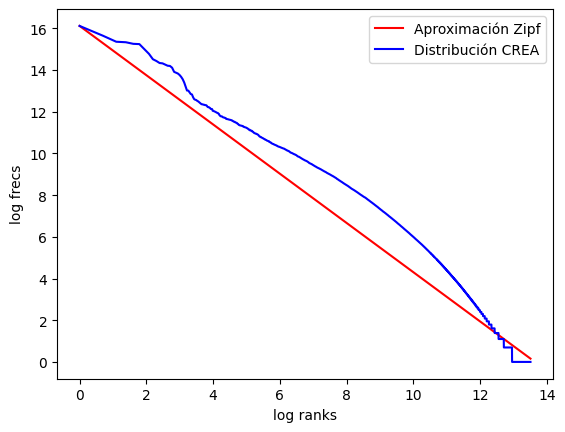

In [38]:
plot_generate_zipf(a_hat, ranks, frecs)
plt.plot(np.log(ranks),np.log(frecs), color='b', label='Distribuci√≥n CREA')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Ley de Heap

Relaci√≥n entre el n√∫mero de **tokens** y **tipos** de un corpus

$$T \propto N^b$$

D√≥nde:

- $T = $ n√∫mero de tipos
- $N = $ n√∫mero de tokens
- $b = $ par√°metro  

- **TOKENS**: N√∫mero total de palabras dentro del texto (incluidas repeticiones)
- **TIPOS**: N√∫mero total de palabras √∫nicas en el texto

#### üìä Ejercicio: Muestra el plot de tokens vs types para el corpus CREA

**HINT:** Obtener tipos y tokens acumulados

In [39]:
# PLOT tokens vs types
total_tokens = corpus_freqs["freq"].sum()
total_types = len(corpus_freqs)

In [40]:
corpus_sorted = corpus_freqs.sort_values(by="freq", ascending=False)
corpus_sorted["cum_tokens"] = corpus_sorted["freq"].cumsum()
corpus_sorted["cum_types"] = range(1, total_types +1)

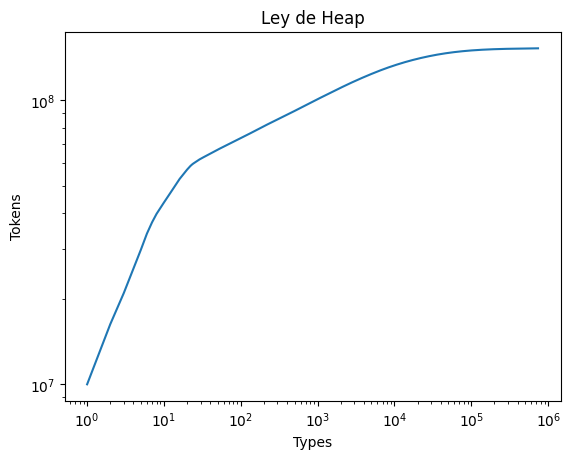

In [41]:
# Plot de la ley de Heap
plt.plot(corpus_sorted['cum_types'], corpus_sorted['cum_tokens'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Types')
plt.ylabel('Tokens')
plt.title('Ley de Heap')
plt.show()

### Representaciones vectoriales est√°ticas (est√°ticos)

- Buscamos una forma de mapear textos al **espacio vectorial**. Tener una representaci√≥n numerica permite su procesamiento.
    - Similitud de docs
    - Clasificacion (agrupamiento)
- Veremos el enfoque de la Bolsa de Palabras (Bag of Words)
   - Matriz de documentos-terminos
   - Cada fila es un vector con $N$ features donde las features ser√°n el vocabulario del corpus

<center>
<img src="https://preview.redd.it/sqkqsuit7o831.jpg?width=1024&auto=webp&s=2d18d38fe9d04a4a62c9a889e7b34ef14b425630" width=500></center>

In [42]:
import gensim

In [43]:
doc_1 = "Augusta Ada King, condesa de Lovelace (Londres, 10 de diciembre de 1815-√≠d., 27 de noviembre de 1852), registrada al nacer como Augusta Ada Byron y conocida habitualmente como Ada Lovelace, fue una matem√°tica y escritora brit√°nica, c√©lebre sobre todo por su trabajo acerca de la computadora mec√°nica de uso general de Charles Babbage, la denominada m√°quina anal√≠tica. Fue la primera en reconocer que la m√°quina ten√≠a aplicaciones m√°s all√° del c√°lculo puro y en haber publicado lo que se reconoce hoy como el primer algoritmo destinado a ser procesado por una m√°quina, por lo que se le considera como la primera programadora de ordenadores."
doc_2 = "Brassica oleracea var. italica, el br√≥coli,1‚Äã br√©col2‚Äã o br√≥quil3‚Äã del italiano broccoli (brote), es una planta de la familia de las brasic√°ceas. Existen otras variedades de la misma especie, tales como: repollo (B. o. capitata), la coliflor (B. o. botrytis), el colinabo (B. o. gongylodes) y la col de Bruselas (B. o. gemmifera). El llamado br√≥coli chino o kai-lan (B. o. alboglabra) es tambi√©n una variedad de Brassica oleracea."
doc_3 = "La bicicleta de pi√±√≥n fijo, fixie o fixed es una bicicleta monomarcha, que no tiene pi√±√≥n libre, lo que significa que no tiene punto muerto; es decir, los pedales est√°n siempre en movimiento cuando la bicicleta est√° en marcha. Esto significa que no se puede dejar de pedalear, ya que, mientras la rueda trasera gire, la cadena y los pedales girar√°n siempre solidariamente. Por este motivo, se puede frenar haciendo una fuerza inversa al sentido de la marcha, y tambi√©n ir marcha atr√°s."

In [44]:
documents = [doc_1, doc_2, doc_3]

In [45]:
from gensim.utils import simple_preprocess

def sent_to_words(sentences: list[str]) -> list[list[str]]:
    """Function convert sentences to words

    Use the tokenizer provided by gensim using
    `simple_process()` which remove punctuation and converte
    to lowercase (`deacc=True`)
    """
    return [simple_preprocess(sent, deacc=True) for sent in sentences]

In [46]:
docs_tokenized = sent_to_words(documents)
docs_tokenized[0][:10]

['augusta',
 'ada',
 'king',
 'condesa',
 'de',
 'lovelace',
 'londres',
 'de',
 'diciembre',
 'de']

In [47]:
from gensim.corpora import Dictionary

gensim_dic = Dictionary()
bag_of_words_corpus = [gensim_dic.doc2bow(doc, allow_update=True) for doc in docs_tokenized]

In [48]:
type(gensim_dic)

gensim.corpora.dictionary.Dictionary

In [49]:
for k, v in gensim_dic.iteritems():
    print(k, v)

0 acerca
1 ada
2 al
3 algoritmo
4 alla
5 analitica
6 aplicaciones
7 augusta
8 babbage
9 britanica
10 byron
11 calculo
12 celebre
13 charles
14 como
15 computadora
16 condesa
17 conocida
18 considera
19 de
20 del
21 denominada
22 destinado
23 diciembre
24 el
25 en
26 escritora
27 fue
28 general
29 haber
30 habitualmente
31 hoy
32 id
33 king
34 la
35 le
36 lo
37 londres
38 lovelace
39 maquina
40 mas
41 matematica
42 mecanica
43 nacer
44 noviembre
45 ordenadores
46 por
47 primer
48 primera
49 procesado
50 programadora
51 publicado
52 puro
53 que
54 reconoce
55 reconocer
56 registrada
57 se
58 ser
59 sobre
60 su
61 tenia
62 todo
63 trabajo
64 una
65 uso
66 alboglabra
67 botrytis
68 brasicaceas
69 brassica
70 brecol
71 broccoli
72 brocoli
73 broquil
74 brote
75 bruselas
76 capitata
77 chino
78 col
79 coliflor
80 colinabo
81 es
82 especie
83 existen
84 familia
85 gemmifera
86 gongylodes
87 italiano
88 italica
89 kai
90 lan
91 las
92 llamado
93 misma
94 oleracea
95 otras
96 planta
97 repollo


In [50]:
print(len(bag_of_words_corpus))
bag_of_words_corpus[0]

3


[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 4),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 9),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 5),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 3),
 (47, 1),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 3),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 2),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 1)]

In [51]:
def bag_to_dict(bag_of_words: list, gensim_dic: Dictionary, titles: list[str]) -> list:
    data = {}
    for doc, title in zip(bag_of_words, titles):
        data[title] = dict([(gensim_dic[id], freq) for id, freq in doc])
    return data

In [52]:
data = bag_to_dict(bag_of_words_corpus, gensim_dic, titles=["ADA", "BROCOLI", "FIXED"])

In [53]:
data

{'ADA': {'acerca': 1,
  'ada': 3,
  'al': 1,
  'algoritmo': 1,
  'alla': 1,
  'analitica': 1,
  'aplicaciones': 1,
  'augusta': 2,
  'babbage': 1,
  'britanica': 1,
  'byron': 1,
  'calculo': 1,
  'celebre': 1,
  'charles': 1,
  'como': 4,
  'computadora': 1,
  'condesa': 1,
  'conocida': 1,
  'considera': 1,
  'de': 9,
  'del': 1,
  'denominada': 1,
  'destinado': 1,
  'diciembre': 1,
  'el': 1,
  'en': 2,
  'escritora': 1,
  'fue': 2,
  'general': 1,
  'haber': 1,
  'habitualmente': 1,
  'hoy': 1,
  'id': 1,
  'king': 1,
  'la': 5,
  'le': 1,
  'lo': 2,
  'londres': 1,
  'lovelace': 2,
  'maquina': 3,
  'mas': 1,
  'matematica': 1,
  'mecanica': 1,
  'nacer': 1,
  'noviembre': 1,
  'ordenadores': 1,
  'por': 3,
  'primer': 1,
  'primera': 2,
  'procesado': 1,
  'programadora': 1,
  'publicado': 1,
  'puro': 1,
  'que': 3,
  'reconoce': 1,
  'reconocer': 1,
  'registrada': 1,
  'se': 2,
  'ser': 1,
  'sobre': 1,
  'su': 1,
  'tenia': 1,
  'todo': 1,
  'trabajo': 1,
  'una': 2,
  'uso'

In [54]:
import pandas as pd

doc_matrix_simple = pd.DataFrame(data).fillna(0).astype(int).T

In [55]:
doc_matrix_simple

acerca  ada  al  algoritmo  alla  analitica  aplicaciones  augusta  \
ADA           1    3   1          1     1          1             1        2   
BROCOLI       0    0   0          0     0          0             0        0   
FIXED         0    0   1          0     0          0             0        0   

         babbage  britanica  ...  puede  punto  rueda  sentido  siempre  \
ADA            1          1  ...      0      0      0        0        0   
BROCOLI        0          0  ...      0      0      0        0        0   
FIXED          0          0  ...      2      1      1        1        2   

         significa  solidariamente  tiene  trasera  ya  
ADA              0               0      0        0   0  
BROCOLI          0               0      0        0   0  
FIXED            2               1      2        1   1  

[3 rows x 145 columns]

- Tenemos una matrix de terminos-frecuencias ($tf$). Es decir cuantas veces un termino aparece en cierto documento.
- Una variante de esta es una **BoW** binaria. ¬øC√≥mo se ver√≠a?


**¬øVen algun problema?**

- Palabras muy frecuentes que no aportan signifiancia
- Los pesos de las palabras son tratados de forma equitativa
    - Palabras muy frecuentes opacan las menos frecuentes y con mayor significado (sem√°ntico) en nuestros documentos
- Las palabras frecuentes no nos ayudarian a discriminar por ejemplo entre documentos

#### *Term frequency-Inverse Document Frequency* (TF-IDF) al rescate

<center><img src="https://media.tenor.com/Hqyg8s_gh5QAAAAd/perfectly-balanced-thanos.gif" height=250></center>

- Metodo de ponderaci√≥n creado para algoritmos de Information Retrieval
- Bueno para clasificaci√≥n de documentos y clustering
- Se calcula con la multiplicacion $tf_{d,t} \cdot idf_t$

Donde:
  - $tf_{d,t}$ es la frecuencia del termino en un documento $d$
  - $idf_t$ es la frecuencia inversa del termino en toda la colecci√≥n de documentos. Se calcula de la siguiente forma:

$$idf_t = log_2\frac{N}{df_t}$$

Entonces:

$$tf\_idf(d,t) = tf_{d,t} ‚ãÖ \log_2\frac{N}{df_t}$$

#### üßÆ Ejercicio: Aplica TF-IDF usando gensim

**HINT:** https://radimrehurek.com/gensim/models/tfidfmodel.html

In [56]:
from gensim.models import TfidfModel

tfidf = TfidfModel(bag_of_words_corpus, smartirs="ntc")

In [57]:
tfidf[bag_of_words_corpus[0]]

[(0, 0.10051035884473423),
 (1, 0.3015310765342027),
 (2, 0.05025517942236712),
 (3, 0.10051035884473423),
 (4, 0.10051035884473423),
 (5, 0.10051035884473423),
 (6, 0.10051035884473423),
 (7, 0.20102071768946847),
 (8, 0.10051035884473423),
 (9, 0.10051035884473423),
 (10, 0.10051035884473423),
 (11, 0.10051035884473423),
 (12, 0.10051035884473423),
 (13, 0.10051035884473423),
 (14, 0.20102071768946847),
 (15, 0.10051035884473423),
 (16, 0.10051035884473423),
 (17, 0.10051035884473423),
 (18, 0.10051035884473423),
 (19, 0.1877200559394197),
 (20, 0.05025517942236712),
 (21, 0.10051035884473423),
 (22, 0.10051035884473423),
 (23, 0.10051035884473423),
 (24, 0.05025517942236712),
 (25, 0.10051035884473423),
 (26, 0.10051035884473423),
 (27, 0.20102071768946847),
 (28, 0.10051035884473423),
 (29, 0.10051035884473423),
 (30, 0.10051035884473423),
 (31, 0.10051035884473423),
 (32, 0.10051035884473423),
 (33, 0.10051035884473423),
 (34, 0.10428891996634428),
 (35, 0.10051035884473423),
 (36

In [58]:
def bag_to_dict_tfidf(bag_of_words: list, gensim_dic: Dictionary, titles: list[str]) -> list:
    data = {}
    tfidf = TfidfModel(bag_of_words, smartirs="ntc")
    for doc, title in zip(tfidf[bag_of_words], titles):
        data[title] = dict([(gensim_dic[id], freq) for id, freq in doc])
    return data

In [59]:
data = bag_to_dict_tfidf(bag_of_words_corpus, gensim_dic, titles=["ADA", "BROCOLI", "FIXED"])

In [60]:
data

{'ADA': {'acerca': 0.10051035884473423,
  'ada': 0.3015310765342027,
  'al': 0.05025517942236712,
  'algoritmo': 0.10051035884473423,
  'alla': 0.10051035884473423,
  'analitica': 0.10051035884473423,
  'aplicaciones': 0.10051035884473423,
  'augusta': 0.20102071768946847,
  'babbage': 0.10051035884473423,
  'britanica': 0.10051035884473423,
  'byron': 0.10051035884473423,
  'calculo': 0.10051035884473423,
  'celebre': 0.10051035884473423,
  'charles': 0.10051035884473423,
  'como': 0.20102071768946847,
  'computadora': 0.10051035884473423,
  'condesa': 0.10051035884473423,
  'conocida': 0.10051035884473423,
  'considera': 0.10051035884473423,
  'de': 0.1877200559394197,
  'del': 0.05025517942236712,
  'denominada': 0.10051035884473423,
  'destinado': 0.10051035884473423,
  'diciembre': 0.10051035884473423,
  'el': 0.05025517942236712,
  'en': 0.10051035884473423,
  'escritora': 0.10051035884473423,
  'fue': 0.20102071768946847,
  'general': 0.10051035884473423,
  'haber': 0.1005103588

In [61]:
doc_matrix_tfidf = pd.DataFrame(data).fillna(0).T

In [62]:
doc_matrix_tfidf

acerca       ada        al  algoritmo     alla  analitica  \
ADA      0.10051  0.301531  0.050255    0.10051  0.10051    0.10051   
BROCOLI  0.00000  0.000000  0.000000    0.00000  0.00000    0.00000   
FIXED    0.00000  0.000000  0.050281    0.00000  0.00000    0.00000   

         aplicaciones   augusta  babbage  britanica  ...     puede     punto  \
ADA           0.10051  0.201021  0.10051    0.10051  ...  0.000000  0.000000   
BROCOLI       0.00000  0.000000  0.00000    0.00000  ...  0.000000  0.000000   
FIXED         0.00000  0.000000  0.00000    0.00000  ...  0.201123  0.100561   

            rueda   sentido   siempre  significa  solidariamente     tiene  \
ADA      0.000000  0.000000  0.000000   0.000000        0.000000  0.000000   
BROCOLI  0.000000  0.000000  0.000000   0.000000        0.000000  0.000000   
FIXED    0.100561  0.100561  0.201123   0.201123        0.100561  0.201123   

          trasera        ya  
ADA      0.000000  0.000000  
BROCOLI  0.000000  0.000000  
FIXED    0.100561  0.100561  

[3 rows x 145 columns]

#### Calculando similitud entre vectores

<center><img src="https://cdn.acidcow.com/pics/20130320/people_who_came_face_to_face_with_their_doppelganger_19.jpg" width=500></center>

La forma estandar de obtener la similitud entre vectores para **BoW** es con la distancia coseno entre ellos

$$cos(\overrightarrow{v},\overrightarrow{w}) = \frac{\overrightarrow{v} \cdot\overrightarrow{w}}{|\overrightarrow{v}||\overrightarrow{w}|}$$

Aunque hay muchas m√°s formas de [calcular la distancia](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) entre vectores

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

doc_1 = doc_matrix_tfidf.loc["BROCOLI"].values.reshape(1, -1)
doc_2 = doc_matrix_tfidf.loc["FIXED"].values.reshape(1, -1)
cosine_similarity(doc_1, doc_2)

array([[0.04168787]])

#### Agregando m√°s documentos a nuestra bolsa

![](https://media.tenor.com/55hA4TgUrOMAAAAM/bag-bags.gif)

In [64]:
def update_bow(doc: str, bag_of_words: list, gensim_dic: Dictionary) -> pd.DataFrame:
    words = simple_preprocess(doc, deacc=True)
    bag_of_words.append(gensim_dic.doc2bow(words, allow_update=True))
    return bag_of_words

In [65]:
#sample_doc = "Las bicicletas fixie, tambi√©n denominadas bicicletas de pi√±√≥n fijo, son bicis de una sola marcha, de pi√±√≥n fijo, y sin punto muerto, por lo que se debe avanzar, frenar y dar marcha atr√°s con el uso de los pedales. La rueda de atr√°s gira cuando giran los pedales. Si pedaleas hacia delante, avanzas; si paras los pedales, frenas y si pedaleas hacia atr√°s, ir√°s marcha atr√°s. Esto requiere de un entrenamiento a√±adido que la bicicleta con pi√±√≥n libre no lo necesita. No obstante, las bicicletas fixie tienen much√≠simas ventajas."
sample_doc = "El br√≥coli o br√©col es una planta de la familia de las brasic√°ceas, como otras hortalizas que conocemos como coles. Est√° por tanto emparentado con verduras como la coliflor, el repollo y las diferentes coles lisas o rizadas, incluyendo el kale o las coles de Bruselas."

In [66]:
new_bag = update_bow(sample_doc, bag_of_words_corpus.copy(), gensim_dic)
len(new_bag)

4

In [67]:
for k, v in gensim_dic.iteritems():
    print(k, v)

0 acerca
1 ada
2 al
3 algoritmo
4 alla
5 analitica
6 aplicaciones
7 augusta
8 babbage
9 britanica
10 byron
11 calculo
12 celebre
13 charles
14 como
15 computadora
16 condesa
17 conocida
18 considera
19 de
20 del
21 denominada
22 destinado
23 diciembre
24 el
25 en
26 escritora
27 fue
28 general
29 haber
30 habitualmente
31 hoy
32 id
33 king
34 la
35 le
36 lo
37 londres
38 lovelace
39 maquina
40 mas
41 matematica
42 mecanica
43 nacer
44 noviembre
45 ordenadores
46 por
47 primer
48 primera
49 procesado
50 programadora
51 publicado
52 puro
53 que
54 reconoce
55 reconocer
56 registrada
57 se
58 ser
59 sobre
60 su
61 tenia
62 todo
63 trabajo
64 una
65 uso
66 alboglabra
67 botrytis
68 brasicaceas
69 brassica
70 brecol
71 broccoli
72 brocoli
73 broquil
74 brote
75 bruselas
76 capitata
77 chino
78 col
79 coliflor
80 colinabo
81 es
82 especie
83 existen
84 familia
85 gemmifera
86 gongylodes
87 italiano
88 italica
89 kai
90 lan
91 las
92 llamado
93 misma
94 oleracea
95 otras
96 planta
97 repollo


In [68]:
new_data = bag_to_dict_tfidf(new_bag, gensim_dic, ["ADA", "BROCOLI", "FIXED", "SAMPLE"])

In [69]:
new_doc_matrix_tfidf = pd.DataFrame(new_data).fillna(0).T
new_doc_matrix_tfidf

acerca       ada        al  algoritmo      alla  analitica  \
ADA      0.104156  0.312469  0.059299   0.104156  0.104156   0.104156   
BROCOLI  0.000000  0.000000  0.000000   0.000000  0.000000   0.000000   
FIXED    0.000000  0.000000  0.058833   0.000000  0.000000   0.000000   
SAMPLE   0.000000  0.000000  0.000000   0.000000  0.000000   0.000000   

         aplicaciones   augusta   babbage  britanica  ...  conocemos  \
ADA          0.104156  0.208313  0.104156   0.104156  ...   0.000000   
BROCOLI      0.000000  0.000000  0.000000   0.000000  ...   0.000000   
FIXED        0.000000  0.000000  0.000000   0.000000  ...   0.000000   
SAMPLE       0.000000  0.000000  0.000000   0.000000  ...   0.187176   

         diferentes  emparentado  hortalizas  incluyendo      kale     lisas  \
ADA        0.000000     0.000000    0.000000    0.000000  0.000000  0.000000   
BROCOLI    0.000000     0.000000    0.000000    0.000000  0.000000  0.000000   
FIXED      0.000000     0.000000    0.000000    0.000000  0.000000  0.000000   
SAMPLE     0.187176     0.187176    0.187176    0.187176  0.187176  0.187176   

          rizadas     tanto  verduras  
ADA      0.000000  0.000000  0.000000  
BROCOLI  0.000000  0.000000  0.000000  
FIXED    0.000000  0.000000  0.000000  
SAMPLE   0.187176  0.187176  0.187176  

[4 rows x 157 columns]

#### üëØ‚Äç‚ôÇÔ∏è Ejercicio: Calcula la similitud del nuevo documento con el resto de documentos

In [70]:
doc_sample_values = new_doc_matrix_tfidf.loc["SAMPLE"].values.reshape(1, -1)

doc_titles = ["ADA", "BROCOLI", "FIXED"]
for i, doc_title in enumerate(doc_titles):
    current_doc_values = new_doc_matrix_tfidf.loc[doc_title].values.reshape(1, -1)
    print(f"Similarity beetwen SAMPLE/{doc_title}= {cosine_similarity(current_doc_values, doc_sample_values)}")

Similarity beetwen SAMPLE/ADA= [[0.05585885]]
Similarity beetwen SAMPLE/BROCOLI= [[0.18502544]]
Similarity beetwen SAMPLE/FIXED= [[0.02966609]]


## Pr√°ctica 2: Propiedades estad√≠sticas de la lengua

### Fecha de entrega: 2 de Marzo de 2025 11:59pm

1. Verificar si la ley de Zipf se cumple en un lenguaje artificial creado por ustedes.
    - *Ejemplo:* Un "lenguaje artificial" podr√≠a ser simplemente un texto donde las secuencias de caracteres fueron generadas aleatoriamente.


In [71]:
def generate_word(length: int) -> str:
    """
    Generate a random word.
    Parameters:
      length: The length of the word to generate.
      seed: The seed to use for the random number generator.
    Returns:
      A string with the generated word.
    """
    vowels = "aeiou"
    consonants = "bcdfghjklmnpqrstvwxyz"
    probs_num_cons = [0.45, 0.3, 0.15, 0.1]
    probs_num_vow = [0.55, 0.3, 0.15]
    prob_begin_vowel = 0.5

    word = ""
    next_vowel = False
    if np.random.rand() < prob_begin_vowel:
        num_vow = np.random.choice([1, 2, 3], p=probs_num_vow)
        for _ in range(num_vow):
            word += random.choice(vowels)
    else:
        num_cons = np.random.choice([1, 2, 3, 4], p=probs_num_cons)
        for _ in range(num_cons):
            word += random.choice(consonants)
        next_vowel = True

    while len(word) < length:
        if next_vowel:
            num_vow = np.random.choice([1, 2, 3], p=probs_num_vow)
            for _ in range(num_vow):
                word += random.choice(vowels)
            next_vowel = False
        else:
            num_cons = np.random.choice([1, 2, 3, 4], p=probs_num_cons)
            for _ in range(num_cons):
                word += random.choice(consonants)
            next_vowel = True

    if length < len(word):
        word = word[:length]
    return word

In [72]:
def generate_text(length: int, matrix_transition: np.ndarray, seed: int = 42) -> str:
    """
    Generate a text with random characters.
    Parameters:
      length: The length of the text to generate.
      seed: The seed to use for the random number generator.
    Returns:
      A string with the generated text.
    """
    text = []
    length_ = np.random.poisson(3)
    if length_ < 1 or length_ > 25:
        length_ = 3
    text.append(generate_word(length_))
    while len(text) < length:
        probs_next_length = matrix_transition[length_-1]
        length_ = np.random.choice(range(1, matrix_transition.shape[0]+1), p=probs_next_length)
        text.append(generate_word(length_))

    return text

In [73]:
# Definir los estados: Longitudes de palabra de 1 a 25
max_length = 25
states = np.arange(1, max_length + 1)

# Crear una distribuci√≥n inicial que favorezca palabras cortas (usando una distribuci√≥n inversa)
initial_distribution = 1 / states  # M√°s peso a palabras cortas
initial_distribution /= initial_distribution.sum()  # Normalizar

# Matriz de transici√≥n: Probabilidad de ir de una longitud a otra
transition_matrix = np.zeros((max_length, max_length))

# Construir la matriz con mayor probabilidad de transiciones cercanas
for i in range(max_length):
    for j in range(max_length):
        distancia = abs(states[i] - states[j])
        transition_matrix[i, j] = np.exp(-0.5 * distancia)  # Penalizar saltos grandes

    # Favorecer la longitud actual y normalizar la fila
    transition_matrix[i] *= initial_distribution[i]
    transition_matrix[i] /= transition_matrix[i].sum()

In [74]:
text = pd.Series(generate_text(100000, transition_matrix))

In [75]:
words_counts = text.value_counts()

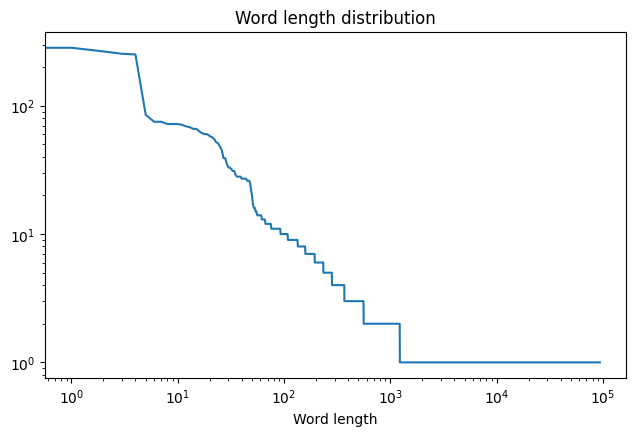

In [76]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(words_counts.index, words_counts.values)
plt.xlabel('Word length')
plt.xscale('log')
plt.yscale('log')
plt.title('Word length distribution')
plt.show()

Podemos ver c√≥mo las frecuencias de las palabras siguen un comportamiento similar a la Ley de Zipf, esto se debe a c√≥mo se construyo el lenguaje, si bien se usan caracteres aleatorios, para la construcci√≥n de las palabras se consider√≥ la secuencia CVCV consonante - vocal / vocal - consonante para cosntruirlas considerando probabilidades altas para secuencias monovoc√°licas, un poco menos para diptongos y poco menos para triptongos; para las secuencias de consonantes se consideran tambi√©n probabilidades altas para solo una consonante y bajan gradualmente hasta secuencias de cuatro vocales.

Por otro lado, se consider√≥ tmabi√©n una matriz de transicion entre palabras modelando con una Cadena de Markov las secuencias de las longitudes de palabras, priorizando las palabras cortas y dando una probabilidad m√°s baja de transicionar a palabras largas, con esto logramos replicar un comportamiento similar a la Ley Zipf

2. Explorar `datasets` del sitio [Hugging Face](https://huggingface.co/datasets) y elegir documentos de diferentes dominios en Espa√±ol (al menos 3). Realizar reconocimiento de entidades nombradas (NER).
    - Pueden utilizar subconjuntos de los datasets encontrados
    - Mostrar resultados del reconocimiento
    - Una distribuci√≥n de frecuencias de las etiquetas m√°s comunes en cada dominio
    - Comentarios generales del desempe√±o observado.

*Sugerencias: Spacy, CoreNLP (puede ser cualquier otra herramienta)*

In [77]:
ds1 = load_dataset("Fernandoefg/cuentos_es")
ds2 = load_dataset("dariolopez/justicio-BOE-A-1978-31229-constitucion-by-articles")
ds3 = load_dataset("Angy309/Noticias")

In [78]:
subset1 = [ds1['train'].data['content'][i].as_py() for i in range(5)]
subset2 = [ds2['train'].data['text'][i].as_py() for i in range(5)]
subset3 = [ds3['test'].data['text'][i].as_py() for i in range(15)]

In [79]:
docs1 = list(nlp.pipe(subset1))
docs2 = list(nlp.pipe(subset2))
docs3 = list(nlp.pipe(subset3))

In [80]:
displacy.render(docs1[0][:500], style="ent")

In [81]:
displacy.render(docs2, style="ent")

In [82]:
displacy.render(docs3, style="ent")

Se utilizaron tres corpus diferentes; uno de cuentos, uno de leyes del gobierno de Espa√±a y otro de noticias. Se utiliz√≥ Spacy junto con su corpus de noticias en Espa√±ol para identificar las entidades nombrada. Se pude observar que para el cuento, Spacy no hace un buen trabajo, en particular la etiqueta ORG (Organizaci√≥n) se utiliza de manera incorrecta y en general el desempe√±o es bastante malo ya que los cuentos al ser un lenguaje m√°s narrativo y descriptivo hacen poco uso de entidades nombradas.

Para el texto de las leyes de Espa√±a mejora el reconocimiento de la etiqueta PERSON esto puede deberse a que en este tipo de textos estas entidades suelen aparecer de forma muy clara para ser preciso en cuanto al lenguaje jur√≠dico, para saber en quien recae la acci√≥n y la responsabilidad.

Finalmente, en el corpus de noticias, la identificaci√≥n fue mucho m√°s precisa y en general fue donde el desempe√±o result√≥ el mejor de entre los tres; esto se debe a que es en este tipo de textos en los que Spicy fue entrenado con su corpus de noticias en Espa√±ol.